In [1]:
from medmnist import OCTMNIST
import numpy as np
from collections import Counter, defaultdict
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
train_dataset = OCTMNIST(split="train", download=True, size=224)
val_dataset = OCTMNIST(split="val", download=True, size=224)
test_dataset = OCTMNIST(split="test", download=True, size=224)

100%|██████████| 3.96G/3.96G [34:22<00:00, 1.92MB/s]  


{'python_class': 'OCTMNIST',
 'description': 'The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−1,536)×(277−512). We center-crop the images and resize them into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/octmnist.npz?download=1',
 'MD5': 'c68d92d5b585d8d81f7112f81e2d0842',
 'url_64': 'https://zenodo.org/records/10519652/files/octmnist_64.npz?download=1',
 'MD5_64': 'e229e9440236b774d9f0dfef9d07bdaf',
 'url_128': 'https://zenodo.org/records/10519652/files/octmnist_128.npz?download=1',
 'MD5_128': '0a97e76651ace45c5d943ee3f65b63ae',
 'url_224': 'https://zenodo.org/records/10519652/files/octmnist_224.npz?downl

In [3]:
label_names = {
    0: "choroidal neovascularization",
    1: "diabetic macular edema",
    2: "drusen",
    3: "normal",
}

In [4]:
def count_classes_with_percentages(dataset):
    labels = np.array(dataset.labels).squeeze()
    total = len(labels)
    counts = Counter(labels)
    percentages = {k: (v / total) * 100 for k, v in counts.items()}
    return counts, percentages

train_counts, train_percentages = count_classes_with_percentages(train_dataset)
val_counts, val_percentages = count_classes_with_percentages(val_dataset)
test_counts, test_percentages = count_classes_with_percentages(test_dataset)

def print_distribution(name, counts, percentages):
    print(f"\n{name} CLASS DISTRIBUTION:")
    for cls in sorted(counts.keys()):
        label = label_names.get(cls, f"Class {cls}")
        print(f"  Class {cls} ({label}): {counts[cls]} samples ({percentages[cls]:.2f}%)")

print_distribution("Train", train_counts, train_percentages)
print_distribution("Validation", val_counts, val_percentages)
print_distribution("Test", test_counts, test_percentages)


Train CLASS DISTRIBUTION:
  Class 0 (choroidal neovascularization): 33484 samples (34.35%)
  Class 1 (diabetic macular edema): 10213 samples (10.48%)
  Class 2 (drusen): 7754 samples (7.95%)
  Class 3 (normal): 46026 samples (47.22%)

Validation CLASS DISTRIBUTION:
  Class 0 (choroidal neovascularization): 3721 samples (34.35%)
  Class 1 (diabetic macular edema): 1135 samples (10.48%)
  Class 2 (drusen): 862 samples (7.96%)
  Class 3 (normal): 5114 samples (47.21%)

Test CLASS DISTRIBUTION:
  Class 0 (choroidal neovascularization): 250 samples (25.00%)
  Class 1 (diabetic macular edema): 250 samples (25.00%)
  Class 2 (drusen): 250 samples (25.00%)
  Class 3 (normal): 250 samples (25.00%)


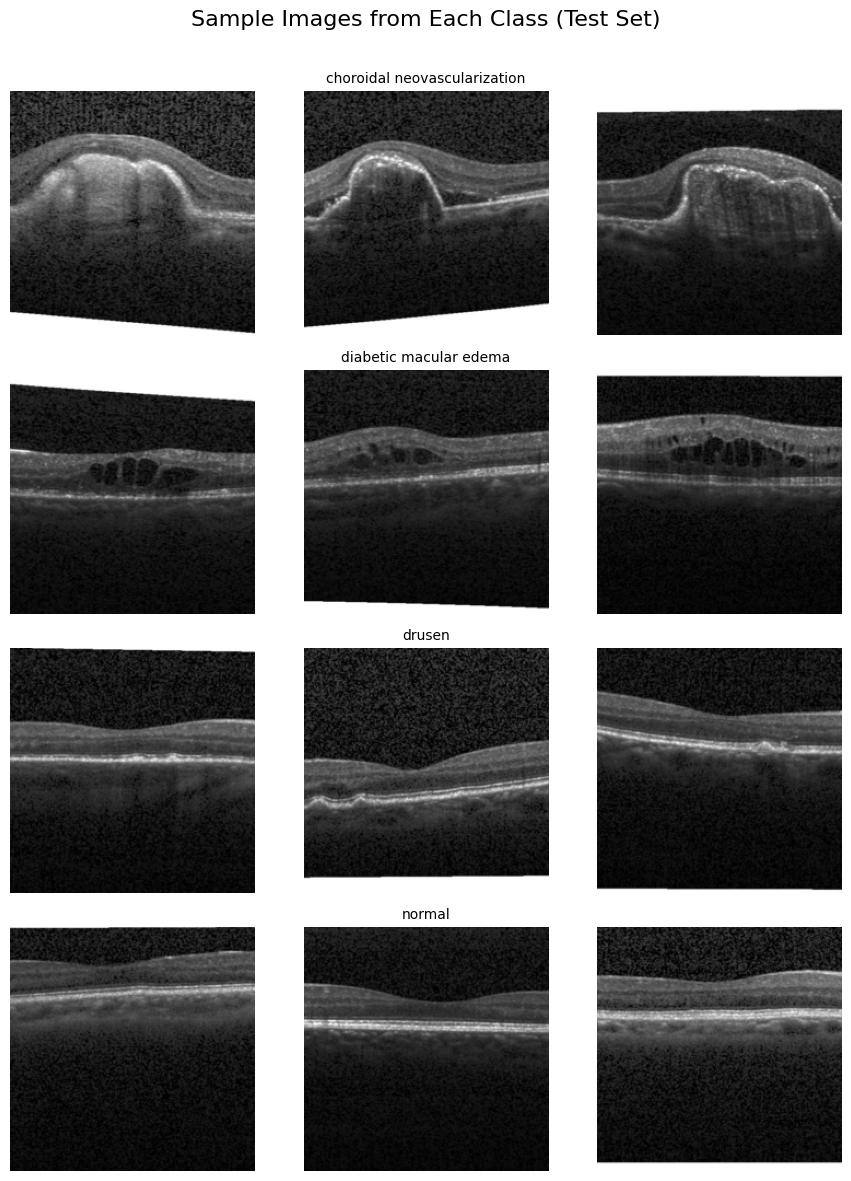

In [5]:
images = test_dataset.imgs
labels = test_dataset.labels.squeeze()

# Zbierz po 3 indeksy z każdej klasy
class_indices = defaultdict(list)
for idx, label in enumerate(labels):
    if len(class_indices[label]) < 3:
        class_indices[label].append(idx)

# Inicjalizacja siatki wykresu
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(9, 12))
fig.suptitle("Sample Images from Each Class (Test Set)", fontsize=16)

# Rysowanie obrazów z użyciem PIL
for row, (class_id, indices) in enumerate(sorted(class_indices.items())):
    for col, idx in enumerate(indices):
        ax = axs[row, col]
        image_array = images[idx].squeeze()  # shape: (H, W)
        image = Image.fromarray(image_array.astype(np.uint8))  # konwersja do obrazu PIL
        ax.imshow(image, cmap="gray")
        ax.axis("off")
        if col == 1:
            ax.set_title(label_names[class_id], fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [22]:
dataset = OCTMNIST(split="train", download=False, size=224)

images = dataset.imgs 
labels = dataset.labels

print(type(images))  
print(f"Min: {images.min()}, Max: {images.max()}")
print(f"Dtype: {images.dtype}")
print(f"Shape: {images.shape}")

<class 'numpy.ndarray'>
Min: 0, Max: 255
Dtype: uint8
Shape: (97477, 224, 224)
